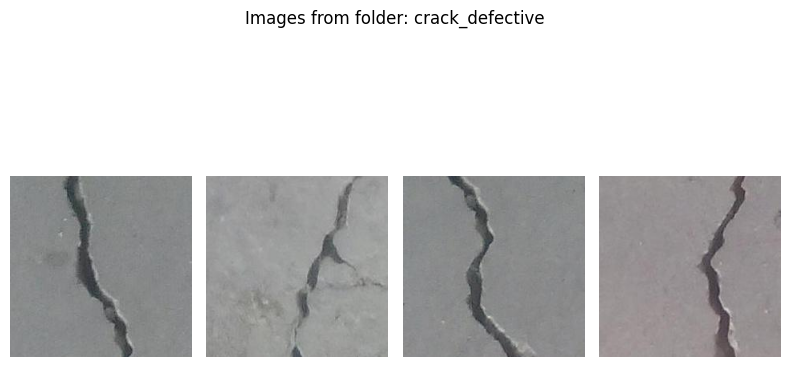

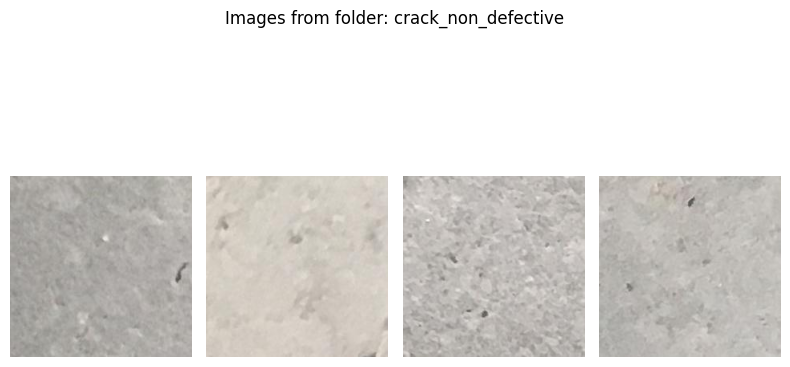

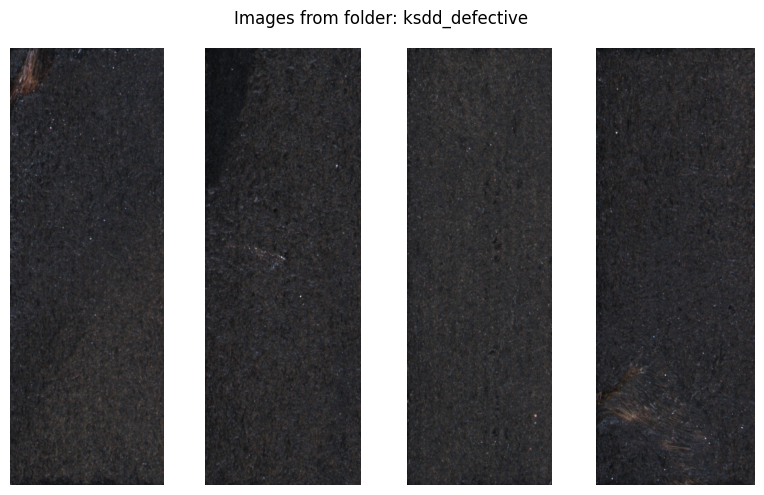

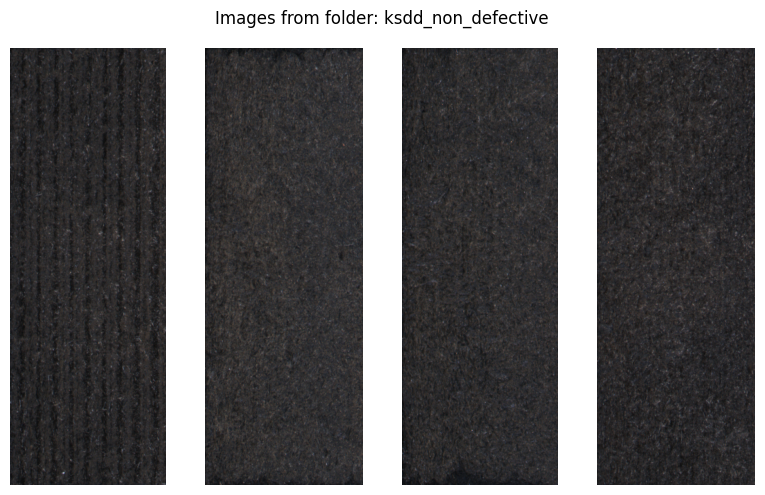

In [6]:
import os
import matplotlib.pyplot as plt


root_dir = "dataset"

# Loop through each folder
for folder_name in os.listdir(root_dir):
  # Construct folder path
  folder_path = os.path.join(root_dir, folder_name)
  
  # Check if it's a directory
  if os.path.isdir(folder_path):
    # Get image paths (assuming all files in folder are images)
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path)]
    
    # Limit to 5 images
    image_paths = image_paths[:4]
    
    # Create a figure for this folder
    fig, axes = plt.subplots(1, 4, figsize=(8, 5))
    fig.suptitle(f"Images from folder: {folder_name}")
    
    # Plot images on the figure
    for i, image_path in enumerate(image_paths):
      img = plt.imread(image_path)
      axes.flat[i].imshow(img)
      axes.flat[i].axis('off')  # Hide axes

    # Show the figure
    plt.tight_layout()
    plt.show()

# Close any open figures
plt.close('all')


<b>Canny Edge Detection</b>

In [21]:
import cv2
%matplotlib inline

def edge_detector(img_path, t_lower = 125, t_upper = 200):
    img = cv2.imread(img_path)  
    edges =  cv2.Canny(img, t_lower, t_upper)
    plt.figure(figsize=(5,3))
    plt.axis('off')
    plt.imshow(edges)
    return None

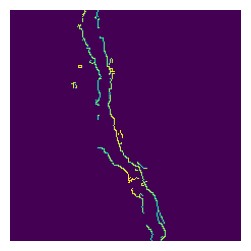

In [23]:
crack_image = r'dataset\crack_defective\00001.jpg'
edge_detector(crack_image)

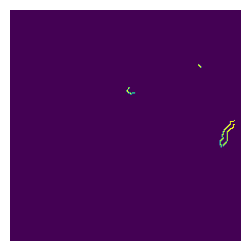

In [22]:
non_crack_image = r'dataset\crack_non_defective\00001.jpg'
edge_detector(non_crack_image, 150, 200)

<b>Latent Space Analysis using VGG19</b>

In [24]:
from torchvision import models

vgg19 = models.vgg19_bn(weights='IMAGENET1K_V1', progress = True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to C:\Users\kalas/.cache\torch\hub\checkpoints\vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:49<00:00, 11.6MB/s]   


In [35]:
import torchvision.transforms.v2 as transforms
from PIL import Image
import torch

In [36]:
def processor(image_path):
    # Define transformations for image pre-processing
    transform = transforms.Compose([
    # Resize the image to the expected size for VGG19 (typically 224x224)
    transforms.Resize((224, 224)),
    
    # Convert the image to a PyTorch tensor
    transforms.ToImage(), 
    transforms.ToDtype(torch.float32),
    
    # Normalize the pixel values according to VGG19's pre-trained mean and standard deviation
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    image = Image.open(image_path)
    processed_image = transform(image)
    return processed_image

In [52]:
def extract_features(img_path, flatten = True):
    input = processor(crack_image)
    with torch.no_grad():
        ft = vgg19.features(input.unsqueeze(0))
    if flatten:
        ft = torch.flatten(ft)
    return ft

In [54]:
%%time
crack_features = extract_features(crack_image)

CPU times: total: 859 ms
Wall time: 342 ms


In [55]:
non_crack_features = extract_features(non_crack_image)

In [56]:
crack_img_2 = r'dataset\crack_defective\00004.jpg'
crack_features_2 = extract_features(crack_img_2)